In [43]:
# 1) 1. What is their overall gross margin for their business?
import pandas as pd

# Load the CSV file
file_path = 'sales_data_1.csv'
sales_data = pd.read_csv(file_path)

# Calculate the total revenue and total cost
sales_data['Total Revenue'] = sales_data['Selling price'] * sales_data['Quantity sold']
sales_data['Total Cost'] = sales_data['Buying price'] * sales_data['Quantity sold']

# Calculate the overall gross margin
total_revenue = sales_data['Total Revenue'].sum()
total_cost = sales_data['Total Cost'].sum()
overall_gross_margin = total_revenue - total_cost

# 1) overall gross margin
print("Total Revenue: ",round(total_revenue,2))
print("Total Cost: ",round(total_cost,2))
print("Overall Gross Margin: ",round(overall_gross_margin,2))

Total Revenue:  127804.31
Total Cost:  96321.56
Overall Gross Margin:  31482.75


In [72]:
# 2) Which vendor is the most profitable?

# Calculate the total profit for each vendor
sales_data['Total Profit'] = (sales_data['Selling price'] - sales_data['Buying price']) * sales_data['Quantity sold']

# Group data by vendor and calculate the total profit for each
vendor_profit = sales_data.groupby('Firm bought from')['Total Profit'].sum()

# Find the vendor with the highest total profit
most_profitable_vendor = vendor_profit.idxmax()
highest_profit = vendor_profit.max()

# Display the most profitable vendor and their total profit
print("The most profitable vendor is {} with a total profit of {}".format(most_profitable_vendor,round(highest_profit,2)))

The most profitable vendor is Vendor4 with a total profit of 6903.31


In [99]:
# 3) Which customer is the least profitable?

# Calculate the total profit for each customer
sales_data['Total Profit'] = (sales_data['Selling price'] - sales_data['Buying price']) * sales_data['Quantity sold']

# Group data by customer and calculate the total profit for each
customer_profit = sales_data.groupby('Customer')['Total Profit'].sum()

# Find the customer with the lowest total profit
least_profitable_customer = customer_profit.idxmin()
lowest_profit = customer_profit.min()

# Display the least profitable customer and their total profit
print("The least profitable customer is '{}' with a total profit of {}".format(least_profitable_customer,lowest_profit))

The least profitable customer is 'Customer3' with a total profit of 1055.05


In [108]:
# 4) Which day of the week was most profitable for them?

# Convert the 'Date' column to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Calculate the total profit for each transaction
sales_data['Total Profit'] = (sales_data['Selling price'] - sales_data['Buying price']) * sales_data['Quantity sold']

# Extract the day of the week and calculate total profit for each day
sales_data['Day of Week'] = sales_data['Date'].dt.day_name()
profit_by_day = sales_data.groupby('Day of Week')['Total Profit'].sum()

# Find the day of the week with the highest total profit
most_profitable_day = profit_by_day.idxmax()
highest_profit = profit_by_day.max()

# Display the most profitable day of the week and the total profit
print("The most profitable day of the week was ",most_profitable_day,"with a total profit of",round(highest_profit,2))

The most profitable day of the week was  Monday with a total profit of 6847.34


In [118]:
# 5) Which day of the week was the least profitable for them?

# Parse the 'Date' column with a specific date format (assuming 'dd-mm-yyyy')
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d-%m-%Y')

# Calculate the total profit for each transaction
sales_data['Total Profit'] = (sales_data['Selling price'] - sales_data['Buying price']) * sales_data['Quantity sold']

# Extract the day of the week and calculate total profit for each day
sales_data['Day of Week'] = sales_data['Date'].dt.day_name()
profit_by_day = sales_data.groupby('Day of Week')['Total Profit'].sum()

# Find the day of the week with the lowest total profit
least_profitable_day = profit_by_day.idxmin()
lowest_profit = profit_by_day.min()

# Display the least profitable day of the week and the total profit
print("The least profitable day of the week was '{}' with a total profit of {}".format(least_profitable_day, round(lowest_profit,2)))

The least profitable day of the week was 'Sunday' with a total profit of 3086.46


In [139]:
# 6) Can you calculate a 3-day average of the daily gross profit from the sales_data_2.csv? 


# Read the CSV file
data = pd.read_csv('sales_data_2.csv')

# Convert date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Calculate the daily gross profit
data['Gross_Profit'] = (data['Selling price'] - data['Buying price']) * data['Quantity sold']

# Group by date and calculate daily gross profit
daily_profit = data.groupby('Date')['Gross_Profit'].sum()

# Calculate the 3-day moving average of daily gross profit
three_day_avg = daily_profit.rolling(window=3).mean()

print(three_day_avg)


Date
2023-08-21            NaN
2023-08-22            NaN
2023-08-23    4848.386667
2023-08-24    4187.950000
2023-08-25    4340.146667
2023-08-26    4617.043333
2023-08-27    4023.853333
Name: Gross_Profit, dtype: float64


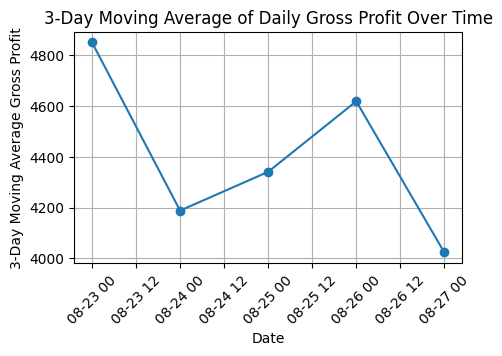

In [185]:
# 7) Additionally, provide insights into how this 3-day trend changes over the time period covered in the dataset. 

import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'])

# Calculate the daily gross profit
data['Gross_Profit'] = (data['Selling price'] - data['Buying price']) * data['Quantity sold']

# Group by date and calculate daily gross profit
daily_profit = data.groupby('Date')['Gross_Profit'].sum()

# Calculate the 3-day moving average of daily gross profit
three_day_avg = daily_profit.rolling(window=3).mean()

# Plotting the 3-day moving average trend
plt.figure(figsize=(5, 3))
plt.plot(three_day_avg, marker='o', linestyle='-')
plt.title('3-Day Moving Average of Daily Gross Profit Over Time')
plt.xlabel('Date')
plt.ylabel('3-Day Moving Average Gross Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [216]:
# 8) Can you optimize the sales process to ensure gross margin is maximized?
#    a) Would you fire any vendor?
#    b) Would you let go of any customer?

# Calculating total sales and profit for each vendor
vendor_sales = data.groupby('Firm bought from')['Quantity sold'].sum()
vendor_purchase_cost = data.groupby('Firm bought from')['Buying price'].sum()
vendor_sales_revenue = data.groupby('Firm bought from')['Selling price'].sum()
vendor_profit = vendor_sales_revenue - vendor_purchase_cost

# Calculating total sales and profit for each customer
customer_purchase_cost = data.groupby('Customer')['Selling price'].sum()
customer_revenue = data.groupby('Customer')['Selling price'].sum()
customer_profit = customer_revenue - customer_purchase_cost

# Determine if any vendors should be fired based on profitability
vendor_flag = False
for vendor in vendor_profit.index:
    if vendor_profit[vendor] < 0:
        print(f"Firing Vendor: {vendor} - Total profit: {vendor_profit[vendor]}")
        vendor_flag = True

customer_falg = False
# Determine if any customers should be let go based on their contribution to profit
for customer in customer_profit.index:
    if customer_profit[customer] < 0:
        print(f"Letting go of Customer: {customer} - Total profit: {customer_profit[customer]}")
        customer_flag = True

if vendor_flag == False:
    print("There is no need for firing any vendor")
else:
    print("We should some the vendors")

if customer_falg == False:
    print("There is no need for letting go of any customers")
else:
    print("We should let go of some customers")

There is no need for firing any vendor
There is no need for letting go of any customers


In [237]:
# 9) To ensure competitive pricing, Ram wants to benchmark their buying and selling prices against the market. 
#     Could you calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices? 

buying_percentiles = data['Buying price'].quantile([0.25, 0.5, 0.75])
print("Buying Price Percentiles:")
print(buying_percentiles)

# Calculate percentiles for selling price
selling_percentiles = data['Selling price'].quantile([0.25, 0.5, 0.75])
print("\nSelling Price Percentiles:")
print(selling_percentiles)

Buying Price Percentiles:
0.25    29.90
0.50    60.76
0.75    78.32
Name: Buying price, dtype: float64

Selling Price Percentiles:
0.25     38.9750
0.50     78.9900
0.75    103.3975
Name: Selling price, dtype: float64


In [260]:
# 10) Additionally, analyze how often the Sapota’s prices fall below the 25th percentile or above 
#   the 75th percentile, potentially indicating they are buying at a high price or selling 
#   at a low price relative to their own transaction history.

buying_25th_percentile = data['Buying price'].quantile(0.25)
buying_75th_percentile = data['Buying price'].quantile(0.75)

selling_25th_percentile = data['Selling price'].quantile(0.25)
selling_75th_percentile = data['Selling price'].quantile(0.75)

# Count how often the prices fall below the 25th percentile or above the 75th percentile
below_25th_buying = data[data['Buying price'] < buying_25th_percentile].shape[0]
above_75th_buying = data[data['Buying price'] > buying_75th_percentile].shape[0]

below_25th_selling = data[data['Selling price'] < selling_25th_percentile].shape[0]
above_75th_selling = data[data['Selling price'] > selling_75th_percentile].shape[0]

print(f"Buying prices falling below the 25th percentile: {below_25th_buying} times")
print(f"Buying prices rising above the 75th percentile: {above_75th_buying} times")


Buying prices falling below the 25th percentile: 18 times
Buying prices rising above the 75th percentile: 18 times


In [286]:
# 11) Bharath says that Vendor 4 has to be honored.  What impact does it have on your optimal gross margin? 

# Calculate the current overall gross margin
data['Gross Margin'] = data['Selling price'] - data['Buying price']
current_gross_margin = data['Gross Margin'].sum()

# Filter out entries related to Vendor 4
vendor_4_data = data[data['Firm bought from'] == 'Vendor4']

# Calculate the impact of honoring Vendor 4 on the gross margin
impact_on_gross_margin = vendor_4_data['Selling price'].sum() - vendor_4_data['Buying price'].sum()

# Calculate the new gross margin after honoring Vendor 4
new_gross_margin = current_gross_margin + impact_on_gross_margin

print("Current Overall Gross Margin: {}".format(round(current_gross_margin,2)))
print("Impact of honoring Vendor 4: {}".format(round(current_gross_margin,2)))
print("New Overall Gross Margin after honoring Vendor 4: {}".format(round(current_gross_margin,2)))

Current Overall Gross Margin: 1207.2
Impact of honoring Vendor 4: 1207.2
New Overall Gross Margin after honoring Vendor 4: 1207.2


In [315]:
# 12) 2. Which vendor should we have a strategic tie up so that we source only from them (the goal here is to have the highest gross margin)
#    - What’s the theoretical max margin the firm could have from that branch?

# Calculate the gross margin for each transaction
data['Gross Margin'] = data['Selling price'] - data['Buying price']

# Calculate the average gross margin for each vendor
avg_gross_margin_by_vendor = data.groupby('Firm bought from')['Gross Margin'].mean().sort_values(ascending=False)

# Vendor with the highest average gross margin
highest_avg_margin_vendor = avg_gross_margin_by_vendor.idxmax()
highest_avg_margin = avg_gross_margin_by_vendor.max()

print("Average Gross Margin for Each Vendor:")
print(avg_gross_margin_by_vendor)
print("\nVendor with the Highest Average Gross Margin:")
print(highest_avg_margin_vendor, "with an average gross margin of", round(highest_avg_margin,2))

Average Gross Margin for Each Vendor:
Firm bought from
Vendor9     27.543333
Vendor3     27.530000
Vendor4     18.901111
Vendor5     16.711429
Vendor7     16.070000
Vendor2     14.646364
Vendor10    13.763333
Vendor8     11.886667
Vendor6     10.703333
Vendor1     10.646000
Name: Gross Margin, dtype: float64

Vendor with the Highest Average Gross Margin:
Vendor9 with an average gross margin of 27.54


In [346]:
# 13) Given this is the ground truth, what is the price elasticity of Sapota for that branch? 
#     (If you increase by Rs.1, how much sales will go up/down and if you decrease price by Rs. 1, how much sales will go up/down) 

# Calculate total sales at the initial price
initial_total_sales = data['Selling price'].sum()

# Function to calculate price elasticity
def calculate_elasticity(price_change):
    # Change the price by the specified amount
    data['Selling price'] += price_change

    # Calculate total sales after price change
    new_total_sales = data['Selling price'].sum()

    # Calculate the percentage change in quantity demanded
    percentage_change_quantity_demanded = ((new_total_sales - initial_total_sales) / initial_total_sales) * 100

    # Calculate price elasticity
    price_elasticity = percentage_change_quantity_demanded / price_change

    return price_elasticity

# Calculate the price elasticity for a price increase by Rs. 1
price_increase = 1
elasticity_increase = calculate_elasticity(price_increase)
print("Price elasticity for a price increase of Rs. 1: {}".format(round(elasticity_increase,2)))

# Calculate the price elasticity for a price decrease by Rs. 1
price_decrease = -1
elasticity_decrease = calculate_elasticity(price_decrease)
print("Price elasticity for a price decrease of Rs. 1: {}".format(round(elasticity_decrease,2)))

Price elasticity for a price increase of Rs. 1: 1.35
Price elasticity for a price decrease of Rs. 1: -0.0
